In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
df= pd.read_csv('Air Passengers.csv',index_col='Month',parse_dates=True)

In [5]:
df.shape

(144, 1)

In [13]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


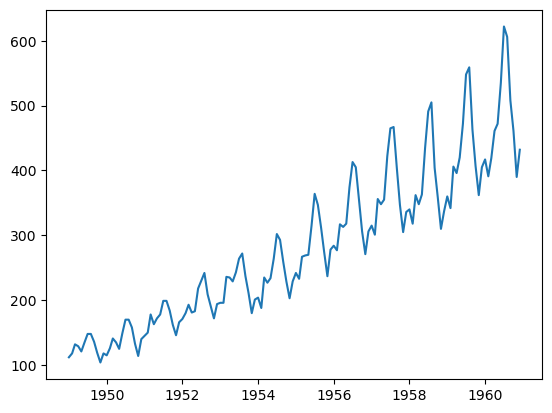

In [7]:
plt.plot(df)

## Simple_Exp_Smoothing

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
simple=SimpleExpSmoothing(df['#Passengers']).fit(smoothing_level=0.4)

In [15]:
sim_pred=simple.fittedvalues

In [22]:
sim_for=simple.forecast(20)

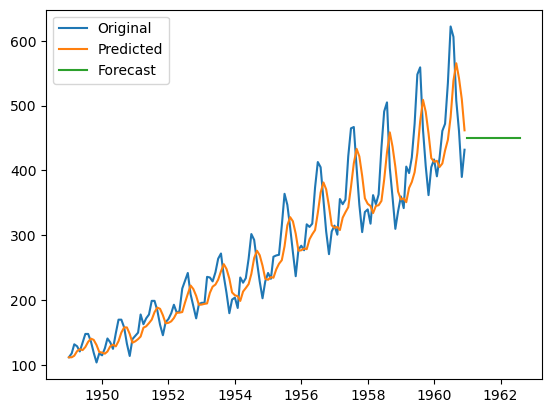

In [23]:
plt.plot(df['#Passengers'],label='Original')
plt.plot(sim_pred,label='Predicted')
plt.plot(sim_for,label='Forecast')
plt.legend()

### Double_Exp_Smoothing

In [26]:
double=ExponentialSmoothing(df['#Passengers'],trend='multiplicative').fit(smoothing_level=0.7,smoothing_trend=0.8)

In [27]:
doub_pred= double.fittedvalues

In [28]:
doub_fore= double.forecast(20)

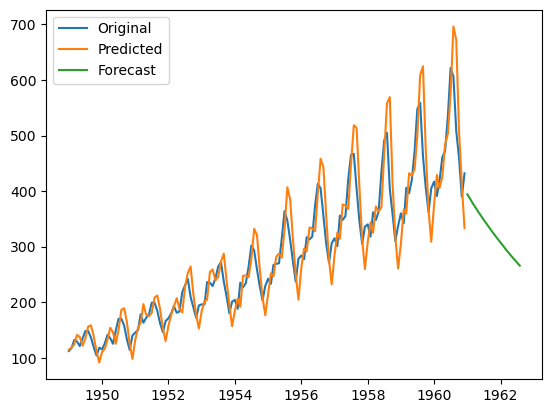

In [29]:
plt.plot(df['#Passengers'],label='Original')
plt.plot(doub_pred,label='Predicted')
plt.plot(doub_fore,label='Forecast')
plt.legend()

### Triple_Exp_Smoothing

In [40]:
triple=ExponentialSmoothing(df['#Passengers'],trend='multiplicative',
                     seasonal='multiplicative',seasonal_periods=12).fit(smoothing_level=0.7,smoothing_trend=0.4,
                                                                        smoothing_seasonal=0.7)

In [41]:
trip_pred= triple.fittedvalues

In [42]:
trip_for= triple.forecast(20)

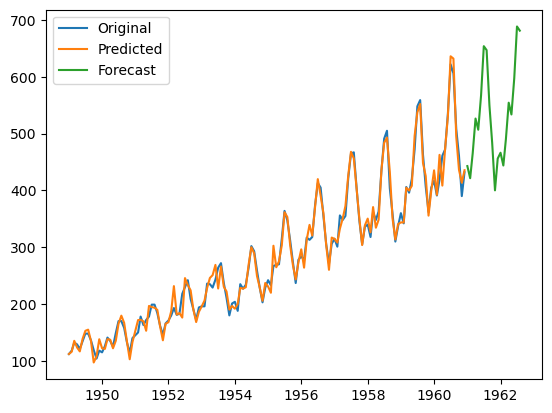

In [43]:
plt.plot(df['#Passengers'],label='Original')
plt.plot(trip_pred,label='Predicted')
plt.plot(trip_for,label='Forecast')
plt.legend()

In [50]:
## mean_squared_error
simple_mse= mean_squared_error(df['#Passengers'],sim_pred).round(2)
double_mse= mean_squared_error(df['#Passengers'],doub_pred).round(2)
triple_mse= mean_squared_error(df['#Passengers'],trip_pred).round(2)
print(simple_mse,',',double_mse,',',triple_mse)

1910.14 , 1909.67 , 181.87


In [52]:
## mean_absolute_error
simple_mae= mean_absolute_error(df['#Passengers'],sim_pred).round(2)
double_mae= mean_absolute_error(df['#Passengers'],doub_pred).round(2)
triple_mae= mean_absolute_error(df['#Passengers'],trip_pred).round(2)
print(simple_mae,',',double_mae,',',triple_mae)

32.38 , 32.3 , 9.68


In [56]:
## mean_absolute_percentage_error
simple_mape= mean_absolute_percentage_error(df['#Passengers'],sim_pred).round(2)*100
double_mape= mean_absolute_percentage_error(df['#Passengers'],doub_pred).round(2)*100
triple_mape= mean_absolute_percentage_error(df['#Passengers'],trip_pred).round(2)*100
print(simple_mape,',',double_mape,',',triple_mape)

11.0 , 11.0 , 4.0


In [66]:
data= pd.DataFrame({'Methods':['SES','DES','TES'],'MAE':[simple_mae,double_mae,triple_mae],
                   'MSE':[simple_mse,double_mse,triple_mse],'MAPE':[simple_mape,double_mape,triple_mape]})
data

,Methods,MAE,MSE,MAPE
0,SES,32.38,1910.14,11.0
1,DES,32.30,1909.67,11.0
2,TES,9.68,181.87,4.0


Text(0.5, 1.0, 'MAPE')

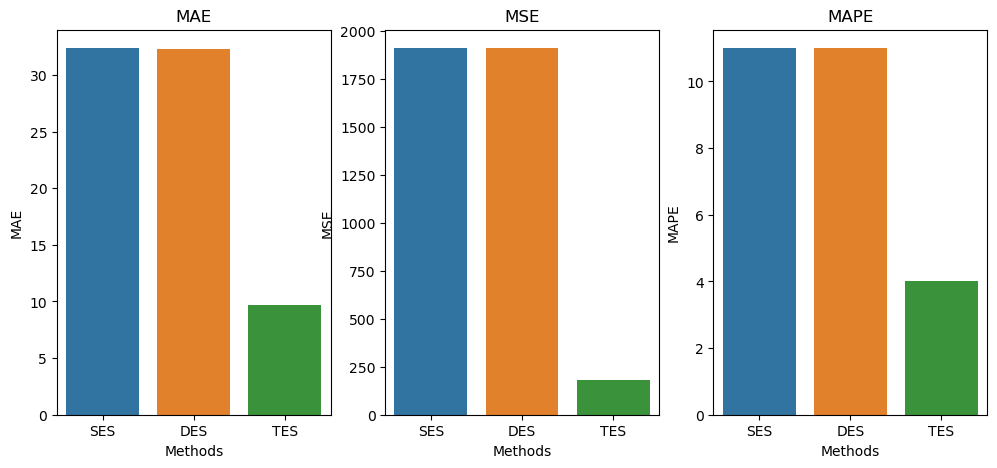

In [73]:
fig,axs= plt.subplots(1,3,figsize=(12,5))
sns.barplot(data=data,ax=axs[0],x='Methods',y='MAE')
axs[0].set_title('MAE')
sns.barplot(data=data,ax=axs[1],x='Methods',y='MSE')
axs[1].set_title('MSE')
sns.barplot(data=data,ax=axs[2],x='Methods',y='MAPE')
axs[2].set_title('MAPE')